//anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Prediction: [2 2 2 2]


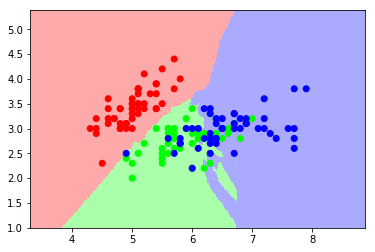

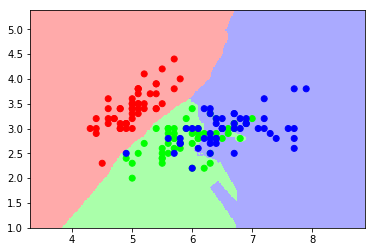

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jul  2 08:59:05 2017

@author: jerry
"""

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
#觀察資料數
iris.data.shape

df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
#賦予已知資訊
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

#Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)
#Training
knn.fit(df.iloc[0:150,0:4], df['Target'])
#顯示訓練結果分數，需要大於0.8~0.9
knn.score(df.iloc[0:150,0:4], df['Target'])

#新的資鍊
x_new = np.array([[5.9, 3.0, 5.1, 1.8], [0.1, 0.2, 0.3, 0.4]])
df_new = df_new=df.iloc[0:3,0:4]
#Single Row
knn.predict([5.9, 3.0, 5.1, 1.8])
#Array
#輸入新的資料
knn.predict(x_new)
#Pandas（預測自己資料第145~149）
knn.predict(df_new)
knn.predict(df.iloc[145:149,0:4])
#Print
print('Prediction:',knn.predict(df.iloc[145:149,0:4]))

############Visual iris with KNN

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 20

iris = datasets.load_iris()
X = iris.data[:, :2]  
                     
y = iris.target

h = .02  


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
 

plt.show()
